In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [2]:
data_1 = pd.read_csv("UNSW_NB15_training-set.csv")

In [3]:
data_1.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0


In [4]:
data_1.fillna(method='ffill', inplace=True)
data_1

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


In [5]:
columns = list(data_1)

In [6]:
columns

['id',
 'dur',
 'proto',
 'service',
 'state',
 'spkts',
 'dpkts',
 'sbytes',
 'dbytes',
 'rate',
 'sttl',
 'dttl',
 'sload',
 'dload',
 'sloss',
 'dloss',
 'sinpkt',
 'dinpkt',
 'sjit',
 'djit',
 'swin',
 'stcpb',
 'dtcpb',
 'dwin',
 'tcprtt',
 'synack',
 'ackdat',
 'smean',
 'dmean',
 'trans_depth',
 'response_body_len',
 'ct_srv_src',
 'ct_state_ttl',
 'ct_dst_ltm',
 'ct_src_dport_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'is_ftp_login',
 'ct_ftp_cmd',
 'ct_flw_http_mthd',
 'ct_src_ltm',
 'ct_srv_dst',
 'is_sm_ips_ports',
 'attack_cat',
 'label']

In [7]:
features = pd.read_csv("NUSW-NB15_features.csv", encoding='windows-1251', delimiter=",") #описание набора данных

In [8]:
features

,No.,Name,Type,Description,Russian
0,1,srcip,nominal,Source IP address,IP-адрес источника
1,2,sport,integer,Source port number,Номер порта источника
2,3,dstip,nominal,Destination IP address,IP-адрес назначения
3,4,dsport,integer,Destination port number,Номер порта назначения
4,5,proto,nominal,Transaction protocol,Протокол транзакции
5,"6,state,nominal,""Indicates to the state and it...",NaN,NaN,NaN,NaN
6,7,dur,Float,Record total duration,Запишите общую продолжительность
7,8,sbytes,Integer,Source to destination transaction bytes,Байты транзакции от источника к месту назначения
8,9,dbytes,Integer,Destination to source transaction bytes,Назначение байтов исходной транзакции
9,10,sttl,Integer,Source to destination time to live value,От источника к месту назначения времени к жизн...


In [9]:
plt.figure(figsize=(15,10))
attack_df = data_1["attack_cat"]
attack_df.value_counts()

Normal            56000
Generic           40000
Exploits          33393
Fuzzers           18184
DoS               12264
Reconnaissance    10491
Analysis           2000
Backdoor           1746
Shellcode          1133
Worms               130
Name: attack_cat, dtype: int64

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:>

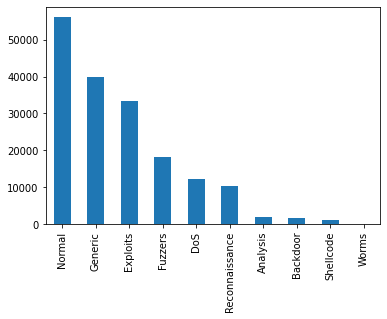

In [10]:
attack_df.value_counts().plot(kind='bar')

In [11]:
X = data_1.drop(['id', 'attack_cat', 'label'], axis = 1)
y = data_1['attack_cat']
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 42 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                175341 non-null  float64
 1   proto              175341 non-null  object 
 2   service            175341 non-null  object 
 3   state              175341 non-null  object 
 4   spkts              175341 non-null  int64  
 5   dpkts              175341 non-null  int64  
 6   sbytes             175341 non-null  int64  
 7   dbytes             175341 non-null  int64  
 8   rate               175341 non-null  float64
 9   sttl               175341 non-null  int64  
 10  dttl               175341 non-null  int64  
 11  sload              175341 non-null  float64
 12  dload              175341 non-null  float64
 13  sloss              175341 non-null  int64  
 14  dloss              175341 non-null  int64  
 15  sinpkt             175341 non-null  float64
 16  di

In [12]:
X
X = pd.get_dummies(X, columns = ["proto"])
X = pd.get_dummies(X, columns = ["state"])
X = pd.get_dummies(X, columns = ["service"])

In [13]:
X["state_ACC"] = pd.Series(np.zeros(175341).T)
X["state_CLO"] = pd.Series(np.zeros(175341).T)
X

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_http,service_irc,service_pop3,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_ACC,state_CLO
0,0.121478,6,4,258,172,74.087490,252,254,1.415894e+04,8495.365234,...,0,0,0,0,0,0,0,0,0.0,0.0
1,0.649902,14,38,734,42014,78.473372,62,252,8.395112e+03,503571.312500,...,0,0,0,0,0,0,0,0,0.0,0.0
2,1.623129,8,16,364,13186,14.170161,62,252,1.572272e+03,60929.230470,...,0,0,0,0,0,0,0,0,0.0,0.0
3,1.681642,12,12,628,770,13.677108,62,252,2.740179e+03,3358.622070,...,0,0,0,0,0,0,0,0,0.0,0.0
4,0.449454,10,6,534,268,33.373826,254,252,8.561499e+03,3987.059814,...,0,0,0,0,0,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0.0,0.0
175337,0.505762,10,8,620,354,33.612649,254,252,8.826286e+03,4903.492188,...,0,0,0,0,0,0,0,0,0.0,0.0
175338,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0.0,0.0
175339,0.000009,2,0,114,0,111111.107200,254,0,5.066666e+07,0.000000,...,0,0,0,0,0,0,0,0,0.0,0.0


In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing

X_normalaized = preprocessing.normalize(X, norm='l2')
model = LogisticRegression(solver='newton-cg', max_iter = 100)
model.fit(X_normalaized, y)

LogisticRegression(solver='newton-cg')

In [15]:
train = pd.read_csv("UNSW_NB15_testing-set.csv")
df_train = train.drop(['id', 'attack_cat', 'label'], axis = 1)
df_train["state_ECO"] = pd.Series(np.zeros(175341).T)
df_train["state_PAR"] = pd.Series(np.zeros(175341).T)
df_train["state_URN"] = pd.Series(np.zeros(175341).T)
df_train["state_no"] = pd.Series(np.zeros(175341).T)
df_train["proto_icmp"] = pd.Series(np.zeros(175341).T)
df_train["proto_rtp"] = pd.Series(np.zeros(175341).T)
df_train_float = pd.get_dummies(df_train, columns = ["proto", "service", "state"])
df_train_normalaized = preprocessing.normalize(df_train_float, norm='l2')
#df_train_normalaized[0:1]
model.predict(df_train_normalaized[0:1])

array(['Generic'], dtype=object)

In [16]:
df_train_ans = train["attack_cat"]
df_train_ans

0        Normal
1        Normal
2        Normal
3        Normal
4        Normal
          ...  
82327    Normal
82328    Normal
82329    Normal
82330    Normal
82331    Normal
Name: attack_cat, Length: 82332, dtype: object

In [17]:
prediction = model.predict(df_train_normalaized)

def mean_absolute_error(predictions, ans):
    err = 0
    for i in range(len(predictions)):
        if predictions[i] != df_train_ans[i]:
            err += 1
    
    err /= len(predictions)
    return err

mean_absolute_error(prediction, df_train_ans)

0.3823057863285235

In [18]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150, 100, 50, 25), random_state=1, max_iter = 500)
clf.fit(X_normalaized, y)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(150, 100, 50, 25), max_iter=500,
              random_state=1)

In [19]:
predictions_mlp = clf.predict(df_train_normalaized)
mean_absolute_error(predictions_mlp, df_train_ans)

0.3825244133508235

In [20]:
from sklearn.linear_model import RidgeClassifier

ridge = RidgeClassifier()
ridge.fit(X_normalaized, y)

RidgeClassifier()

In [21]:
predictions_ridge = ridge.predict(df_train_normalaized)
mean_absolute_error(predictions_ridge, df_train_ans)

0.3828523538842734

In [22]:
atack_detect_y_train = data_1["label"] 
atack_detect_y_train

0         0
1         0
2         0
3         0
4         0
         ..
175336    1
175337    1
175338    1
175339    1
175340    1
Name: label, Length: 175341, dtype: int64

In [23]:
atack_detect_x_train = X_normalaized
atack_detect_x_train

array([[5.30792790e-11, 2.62167367e-09, 1.74778245e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.91806559e-10, 4.13184115e-09, 1.12149974e-08, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [4.45770853e-10, 2.19709390e-09, 4.39418780e-09, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       ...,
       [1.77631161e-13, 3.94735914e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.77631161e-13, 3.94735914e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.77631161e-13, 3.94735914e-08, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [24]:
logreg = LogisticRegression(solver='newton-cg', max_iter = 100)
logreg.fit(atack_detect_x_train, atack_detect_y_train)

LogisticRegression(solver='newton-cg')

In [25]:
prediction_logreg = logreg.predict(df_train_normalaized)

In [26]:
attack_detect_test_ans = train["label"]
c = 0
for i in range(len(attack_detect_test_ans)):
    if prediction_logreg[i] != attack_detect_test_ans[i]:
        c += 1
print(c /len(attack_detect_test_ans) )

0.3164990526162367


In [27]:
model_mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(150, 100, 50, 25, 10, 5), random_state=1, max_iter = 500)
model_mlp.fit(atack_detect_x_train, atack_detect_y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(150, 100, 50, 25, 10, 5),
              max_iter=500, random_state=1)

In [28]:
prediction_mlp = model_mlp.predict(df_train_normalaized) 

In [29]:
c = 0
for i in range(len(attack_detect_test_ans)):
    if prediction_mlp[i] != attack_detect_test_ans[i]:
        c += 1
print(c /len(attack_detect_test_ans) )

0.25273283777874944


In [30]:
model_mlp = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(100,50,20), random_state=1, max_iter = 500)
model_mlp.fit(atack_detect_x_train, atack_detect_y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(100, 50, 20), max_iter=500,
              random_state=1)

In [31]:
prediction_mlp = model_mlp.predict(df_train_normalaized) 

In [32]:
c = 0
for i in range(len(attack_detect_test_ans)):
    if prediction_mlp[i] != attack_detect_test_ans[i]:
        c += 1
print(c /len(attack_detect_test_ans) )

0.25038867026186656


RuntimeError: Cannot run the event loop while another loop is running

0